# Preprocessing steps of csv data

Using all techniques for normalization and vectorization avaliable to let data get transformed to numeric form for further use in algorithms and ML models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# natural language toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

In [3]:
stop_words = set(stopwords.words('english'))

## Reading the training data

In [4]:
data_train = pd.read_csv('Data/Corona_train.csv', encoding="latin1")
data_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
print(f'Number of obs: {data_train.shape[0]}')
print(f'Number of cols: {data_train.shape[1]}')
print(f'Name of columns: {data_train.columns.values}')

Number of obs: 41157
Number of cols: 6
Name of columns: ['UserName' 'ScreenName' 'Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


Text(0.5, 1.0, 'Distribution of Tweets by Sentiment Class in training dataset')

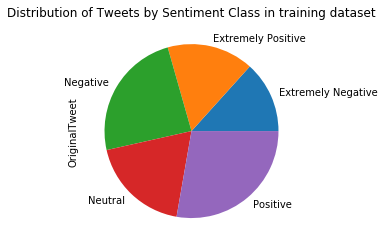

In [31]:
# groping them by sentiment
sentiment_class = data_train['OriginalTweet'].groupby(data_train.Sentiment).count()
ax = sentiment_class.plot(kind='pie')
ax.set_title('Distribution of Tweets by Sentiment Class in training dataset')

In [32]:
# in percentages:
sentiment_class_per = sentiment_class/data_train.shape[0]*100
print(sentiment_class_per) 

Sentiment
Extremely Negative    13.317297
Extremely Positive    16.094468
Negative              24.095537
Neutral               18.740433
Positive              27.752266
Name: OriginalTweet, dtype: float64


Text(0.5, 1.0, 'Distribution of classes in training set in percentages')

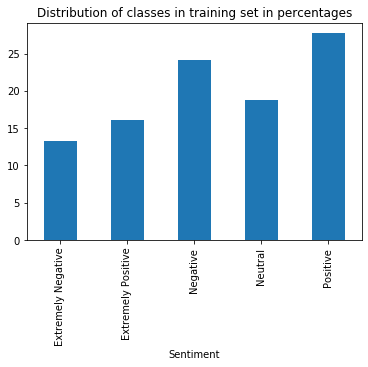

In [12]:
ax = sentiment_class_per.plot(kind='bar')
ax.set_title('Distribution of classes in training set in percentages')

In [23]:
# example of one tweet along with its sentiment:
data_train.iloc[5,4:6].values

array(['As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU',
       'Positive'], dtype=object)

## Reading the testing data

In [24]:
data_test = pd.read_csv('Data/Corona_test.csv', encoding="latin1")
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [25]:
print(f'Number of obs: {data_test.shape[0]}')
print(f'Number of cols: {data_test.shape[1]}')
print(f'Name of columns: {data_test.columns.values}')

Number of obs: 3798
Number of cols: 6
Name of columns: ['UserName' 'ScreenName' 'Location' 'TweetAt' 'OriginalTweet' 'Sentiment']


In [27]:
print(f'Test to Training ratio: {data_test.shape[0]/data_train.shape[0]}')
# there is only 10% testing compared to all the training data, we will see if this is good.

Test to Training ratio: 0.09228077848239667


Text(0.5, 1.0, 'Distribution of Tweets by Sentiment Class in testing dataset')

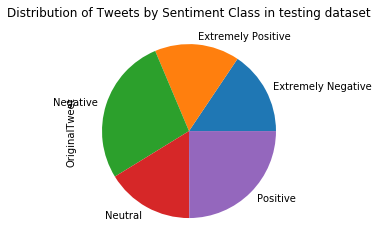

In [33]:
sentiment_test_class = data_test['OriginalTweet'].groupby(data_test.Sentiment).count()
ax = sentiment_test_class.plot(kind='pie')
ax.set_title('Distribution of Tweets by Sentiment Class in testing dataset')

In [34]:
# in percentages:
sentiment_test_class_per = sentiment_test_class/data_test.shape[0]*100
print(sentiment_test_class_per) 

Sentiment
Extremely Negative    15.587151
Extremely Positive    15.771459
Negative              27.409163
Neutral               16.298052
Positive              24.934176
Name: OriginalTweet, dtype: float64


In [37]:
data = {'Training data [%]': sentiment_class_per,
        'Testing data [%]': sentiment_test_class_per}
Sent_distribution = pd.concat(data, axis=1)
Sent_distribution

,Training data [%],Testing data [%]
Sentiment,,
Extremely Negative,13.317297,15.587151
Extremely Positive,16.094468,15.771459
Negative,24.095537,27.409163
Neutral,18.740433,16.298052
Positive,27.752266,24.934176


## Obtaining only the tweet and sentiment

We will deal only with the columns for the tweet and the sentiment. 

`train` will become the dataframe that contains the text and sentiment of the training data

`test` will become the dataframe containing the text and sentiment for testing data

In [60]:
train = data_train.iloc[:,4:6]
train.head(2)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive


In [61]:
test = data_test.iloc[:,4:6]
test.head(2)

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive


In [46]:
# checking for NA values: 
train.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [47]:
# NA values in testing data:
test.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

## Encoding the sentiment classes

We will use encoding for the sentiment classes, so that the analysis gets easier when applying the models.

In [48]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()
train['Sentiment'] = le.fit_transform(train['Sentiment'])
train.head(2)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,advice Talk to your neighbours family to excha...,4


In [63]:
test['Sentiment'] = le.fit_transform(test['Sentiment'])
test.head(2)

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,4


In [64]:
print(le.inverse_transform([0,1,2,3,4]))

['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']


### We have applied the following encoding transformation:

`Extremely Negative`: 0

`Extremely Positive`: 1

`Negative`: 2

`Neutral`: 3

`Positive`: 4

## Cleaning the data from hashtags and twitter symbols

Removing all these symbols will facilitate our analysis and make the models understand the words better.

In [73]:
import re
import string
import random

In [65]:
# transform train and test variables to numpy arrays:
train = train.to_numpy()
test = test.to_numpy()

In [66]:
# now we have both variables as numpy arrays
type(test), type(train)

(numpy.ndarray, numpy.ndarray)

In [70]:
train[:,0]

(41157,)

In [76]:
# for the training texts
for i in range(0,len(train)):
    text = train[i,0]
    text = re.sub("@\S+", " ", text)      # getting rid of @
    text = re.sub("https*\S+", " ", text) # getting rid of https, that can be present everywhere
    text = re.sub("#\S+", " ", text)      # getting rid of hashtags
    text = re.sub("\'\w+", '', text)      # getting rid of spaces
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # changing punctuation
    text = re.sub(r'\w*\d+\w*', '', text) # remove prefixes
    text = re.sub('\s{2,}', " ", text)    # replaces two or more spaces by only one
    text = text.lower()                   # set all text to lower letters
    train[i,0]=text         # store the new variable 


In [77]:
# for the testing cases:
for i in range(0,len(test)):
    text = test[i,0]
    text = re.sub("@\S+", " ", text)      # getting rid of @
    text = re.sub("https*\S+", " ", text) # getting rid of https, that can be present everywhere
    text = re.sub("#\S+", " ", text)      # getting rid of hashtags
    text = re.sub("\'\w+", '', text)      # getting rid of spaces
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # changing punctuation
    text = re.sub(r'\w*\d+\w*', '', text) # remove prefixes
    text = re.sub('\s{2,}', " ", text)    # replaces two or more spaces by only one
    text = text.lower()                   # set all text to lower letters
    test[i,0]=text         # store the new variable 


Now we will see if the texts look the way we would expect:

In [80]:
# training
for i in range(3):
    tweet = train[random.randint(0,len(train)-1),0]
    print('-------')
    print(tweet)

-------
first shops to make this effort could really win the pr game and make a real difference 
-------
for all of you morons queing like maniacs to get into a supermarket and the ones still letting their children out you re part of the problem social distancing really isn t that fucking hard to understand
-------
 absolutely disgusted how you continue to rip off even in the midst of the pandemic that threatens the mere existence of mankind slams high end grocery store for selling wipes ht


In [81]:
# training
for i in range(3):
    tweet = test[random.randint(0,len(test)-1),0]
    print('-------')
    print(tweet)

-------
just did online shopping and first available slot was sunday at loo roll and baked beans sold out 
-------
ontario insists there of food as shoppers rush to stock up due to covid ctv news 
-------
having the extra income to stock up on non perishables and meds etc is a privilege if you can afford it please also donate supplies to food banks and fight for a system that doesn leave people struggling and hungry in a pandemic 


### We have now all the text free of symbols and in lower letters

In [85]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [89]:
train_df.columns = ['Tweet', 'Sentiment_encoded']
test_df.columns = ['Tweet', 'Sentiment_encoded']

In [90]:
# creating csv for training and testing cleaned files
train_df.to_csv('Data/TweetC_train.csv', index=None)
test_df.to_csv('Data/TweetC_test.csv', index=None)